In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pretty
from astropy.io import fits
import pandas as pd
import read_sims

In [2]:
pix=256 #number of pixels on each side
L=300 #length of the box in Mpc/h
l_pix=L/pix

In [3]:
data=fits.open("cic_256.fits")
data_cic=data[0].data

In [4]:
def plot_slice(data,L, axis,r0=None,vmin=-1, vmax=3, cmap="binary",
              xlim=None, ylim=None, zlim=None,ax=None, label=True):
    """plots the slice perpendicular to the given axis, and having r0 axis value
    data: a pix X pix X pix array of density
    L: boxsize in Mpc/h
    axis: axis perpendicular to the slice, takes values 0,1,2
    r0: position at slice
    vmin, vmax: limits for colorbar
    cmap: default is "binary"
    xlim, ylim, zlim: limits of axes in the plane of the slice"""
    pix=len(data)
    l_pix=L/pix
    if (ax is None):
        fig, ax=plt.subplots(1,1,figsize=(10,10))
    if (axis==0):
        x_pix=int(r0/l_pix) #slice to be plotted
        im=ax.imshow(np.log10(np.transpose(data[x_pix,:,:])) ,origin="lower", extent=[0, L, 0, L],
                     vmin=vmin, vmax=vmax, cmap=cmap)
        ax.set_aspect(1)
        ax.set_xlabel(r"$y$ (Mpc/h)")
        ax.set_ylabel(r"$z$ (Mpc/h)")
        if (zlim is None):
            ax.set_xlim(0,L)
        else:
            ax.set_xlim(ylim[0], ylim[1])
        if (ylim is None):
            ax.set_ylim(0,L)
        else:
            ax.set_ylim(zlim[0], zlim[1])
        if (label is True):    
            ax.text(0,L+10*l_pix,"x=%0.2f Mpc/h"%r0)
        
    elif (axis==1):
        y_pix=int(r0/l_pix) #slice to be plotted
        im=ax.imshow(np.log10(data[:,y_pix,:]) ,origin="lower", extent=[0, L, 0, L],vmin=vmin, vmax=vmax,cmap=cmap)
        ax.set_aspect(1)
        ax.set_xlabel(r"$z$ (Mpc/h)")
        ax.set_ylabel(r"$x$ (Mpc/h)")
        if (zlim is None):
            ax.set_xlim(0,L)
        else:
            ax.set_xlim(zlim[0], zlim[1])
        if (xlim is None):
            ax.set_ylim(0,L)
        else:
            ax.set_ylim(xlim[0], xlim[1])
        if (label is True):      
            ax.text(0,L+10*l_pix,"y=%0.2f Mpc/h"%r0)
        
    elif (axis==2):
        z_pix=int(r0/l_pix) #slice to be plotted
        im=ax.imshow(np.log10(np.transpose(data[:,:,z_pix])) ,origin="lower", extent=[0, L, 0, L],
                     vmin=vmin, vmax=vmax,cmap=cmap)
        ax.set_aspect(1)
        ax.set_xlabel(r"$x$ (Mpc/h)")
        ax.set_ylabel(r"$y$ (Mpc/h)")
        if (ylim is None):
            ax.set_xlim(0,L)
        else:
            ax.set_xlim(xlim[0], xlim[1])
        if (xlim is None):
            ax.set_ylim(0,L)
        else:
            ax.set_ylim(ylim[0], ylim[1])
        if (label is True):      
            ax.text(0,L+10*l_pix,"z=%0.2f Mpc/h"%r0)
            
#     fig.colorbar(im, label=r"$\log_{10}(\rho/ \bar{\rho})$")
            
    return ax, im

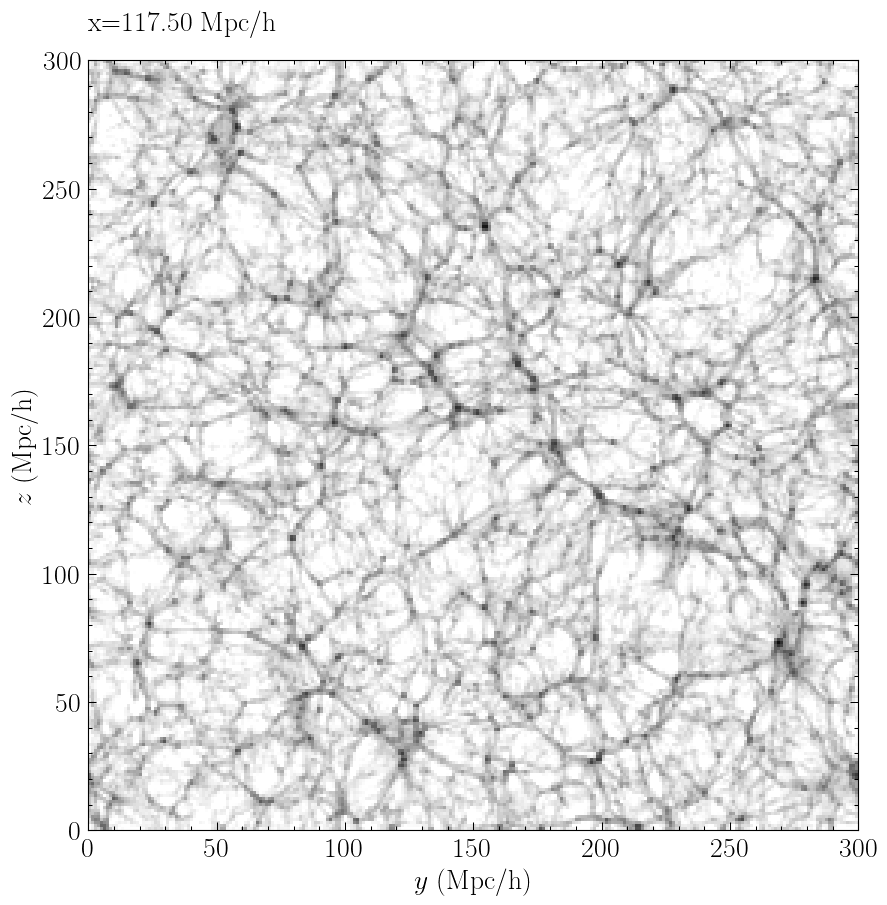

In [5]:
ax, im=plot_slice(data_cic, axis=0,L=300, r0=117.5)

In [6]:
#loading the halo data#halo data
argument=1
mp= 0.192605 #particle mass in 10^10 solar masses/h
file="/scratch/aseem/halos/su1024/delta0.0/r%d/out_1.parents"%argument

ha=read_sims.halos(file)
data=ha.data()

# skip=np.arange(1, 16, 1)
# data=pd.read_csv(halo,sep=" ", skiprows=skip)#first 16 rows contain comments, and are therefore skipped
# #cleaning the halos
#virialisation condition
QE=0.5
TbyU_max = 0.5*(1+QE)
TbyU_min = np.max([0.0,0.5*(1-QE)])
cond_clean = ((data["T/|U|"] < TbyU_max) & (TbyU_min < data["T/|U|"]))
cond_clean = cond_clean & (data["PID"] == -1)
data=data[cond_clean]

Mvir=np.array(data["Mvir"][:])/(1e10) #units of 10^10 solar masses/h
x_halo=np.array(data["X"] )#units Mpc/h
y_halo=np.array(data["Y"])
z_halo=np.array(data["Z"])
Pos_halo=np.array([x_halo, y_halo, z_halo])

# #######################################################################


# #tidal anisotropy data
file="/scratch/aseem/halos/su1024/delta0.0/r%d/out_1.vahc"%argument
colnames=['haloID', 'lam1_R2R200b', 'lam2_R2R200b', 'lam3_R2R200b',
       'lam1_R4R200b', 'lam2_R4R200b', 'lam3_R4R200b', 'lam1_R6R200b',
       'lam2_R6R200b', 'lam3_R6R200b', 'lam1_R8R200b', 'lam2_R8R200b',
       'lam3_R8R200b', 'lam1_R2Mpch', 'lam2_R2Mpch', 'lam3_R2Mpch',
       'lam1_R3Mpch', 'lam2_R3Mpch', 'lam3_R3Mpch', 'lam1_R5Mpch',
       'lam2_R5Mpch', 'lam3_R5Mpch', 'lamH1_R3Mpch', 'lamH2_R3Mpch',
       'lamH3_R3Mpch', 'lamH1_R5Mpch', 'lamH2_R5Mpch', 'lamH3_R5Mpch', 'b1',
       'b1wtd', "#"]
data1=pd.read_csv(file, sep=" ", header=1, names=colnames)
data1=data1[cond_clean]

lam1=np.array(data1["lam1_R4R200b"])
lam2=np.array(data1["lam2_R4R200b"])
lam3=np.array(data1["lam3_R4R200b"])
delta_R=lam1+lam2+lam3
qR=np.abs((((lam3-lam2)**2+(lam3-lam1)**2+(lam2-lam1)**2)/2)**0.5)
alpha=qR/(1+delta_R)


## applying mass cuts and alpha cuts

In [7]:
#halos with mass between M1 and M2
#for 10^12 halos
M1=63
M2=200

mcut=(Mvir>M1)&(Mvir<M2)
Mvir1=Mvir[mcut]
Pos_halo1=Pos_halo[:,mcut]
alpha1=alpha[mcut]

In [8]:
al25=np.percentile(alpha1, 25)
al50=np.percentile(alpha1, 50)
al75=np.percentile(alpha1, 75)

In [9]:
Pos25=Pos_halo1[:,alpha1<al25]
Pos50=Pos_halo1[:,(alpha1>al25)&(alpha1<al50)]
Pos75=Pos_halo1[:,(alpha1>al50)&(alpha1<al75)]
Pos100=Pos_halo1[:,(alpha1>al75)]

Pos_al=[Pos25, Pos50, Pos75, Pos100]
Pos25=Pos50=Pos75=Pos100=0


149.4140625 150.5859375


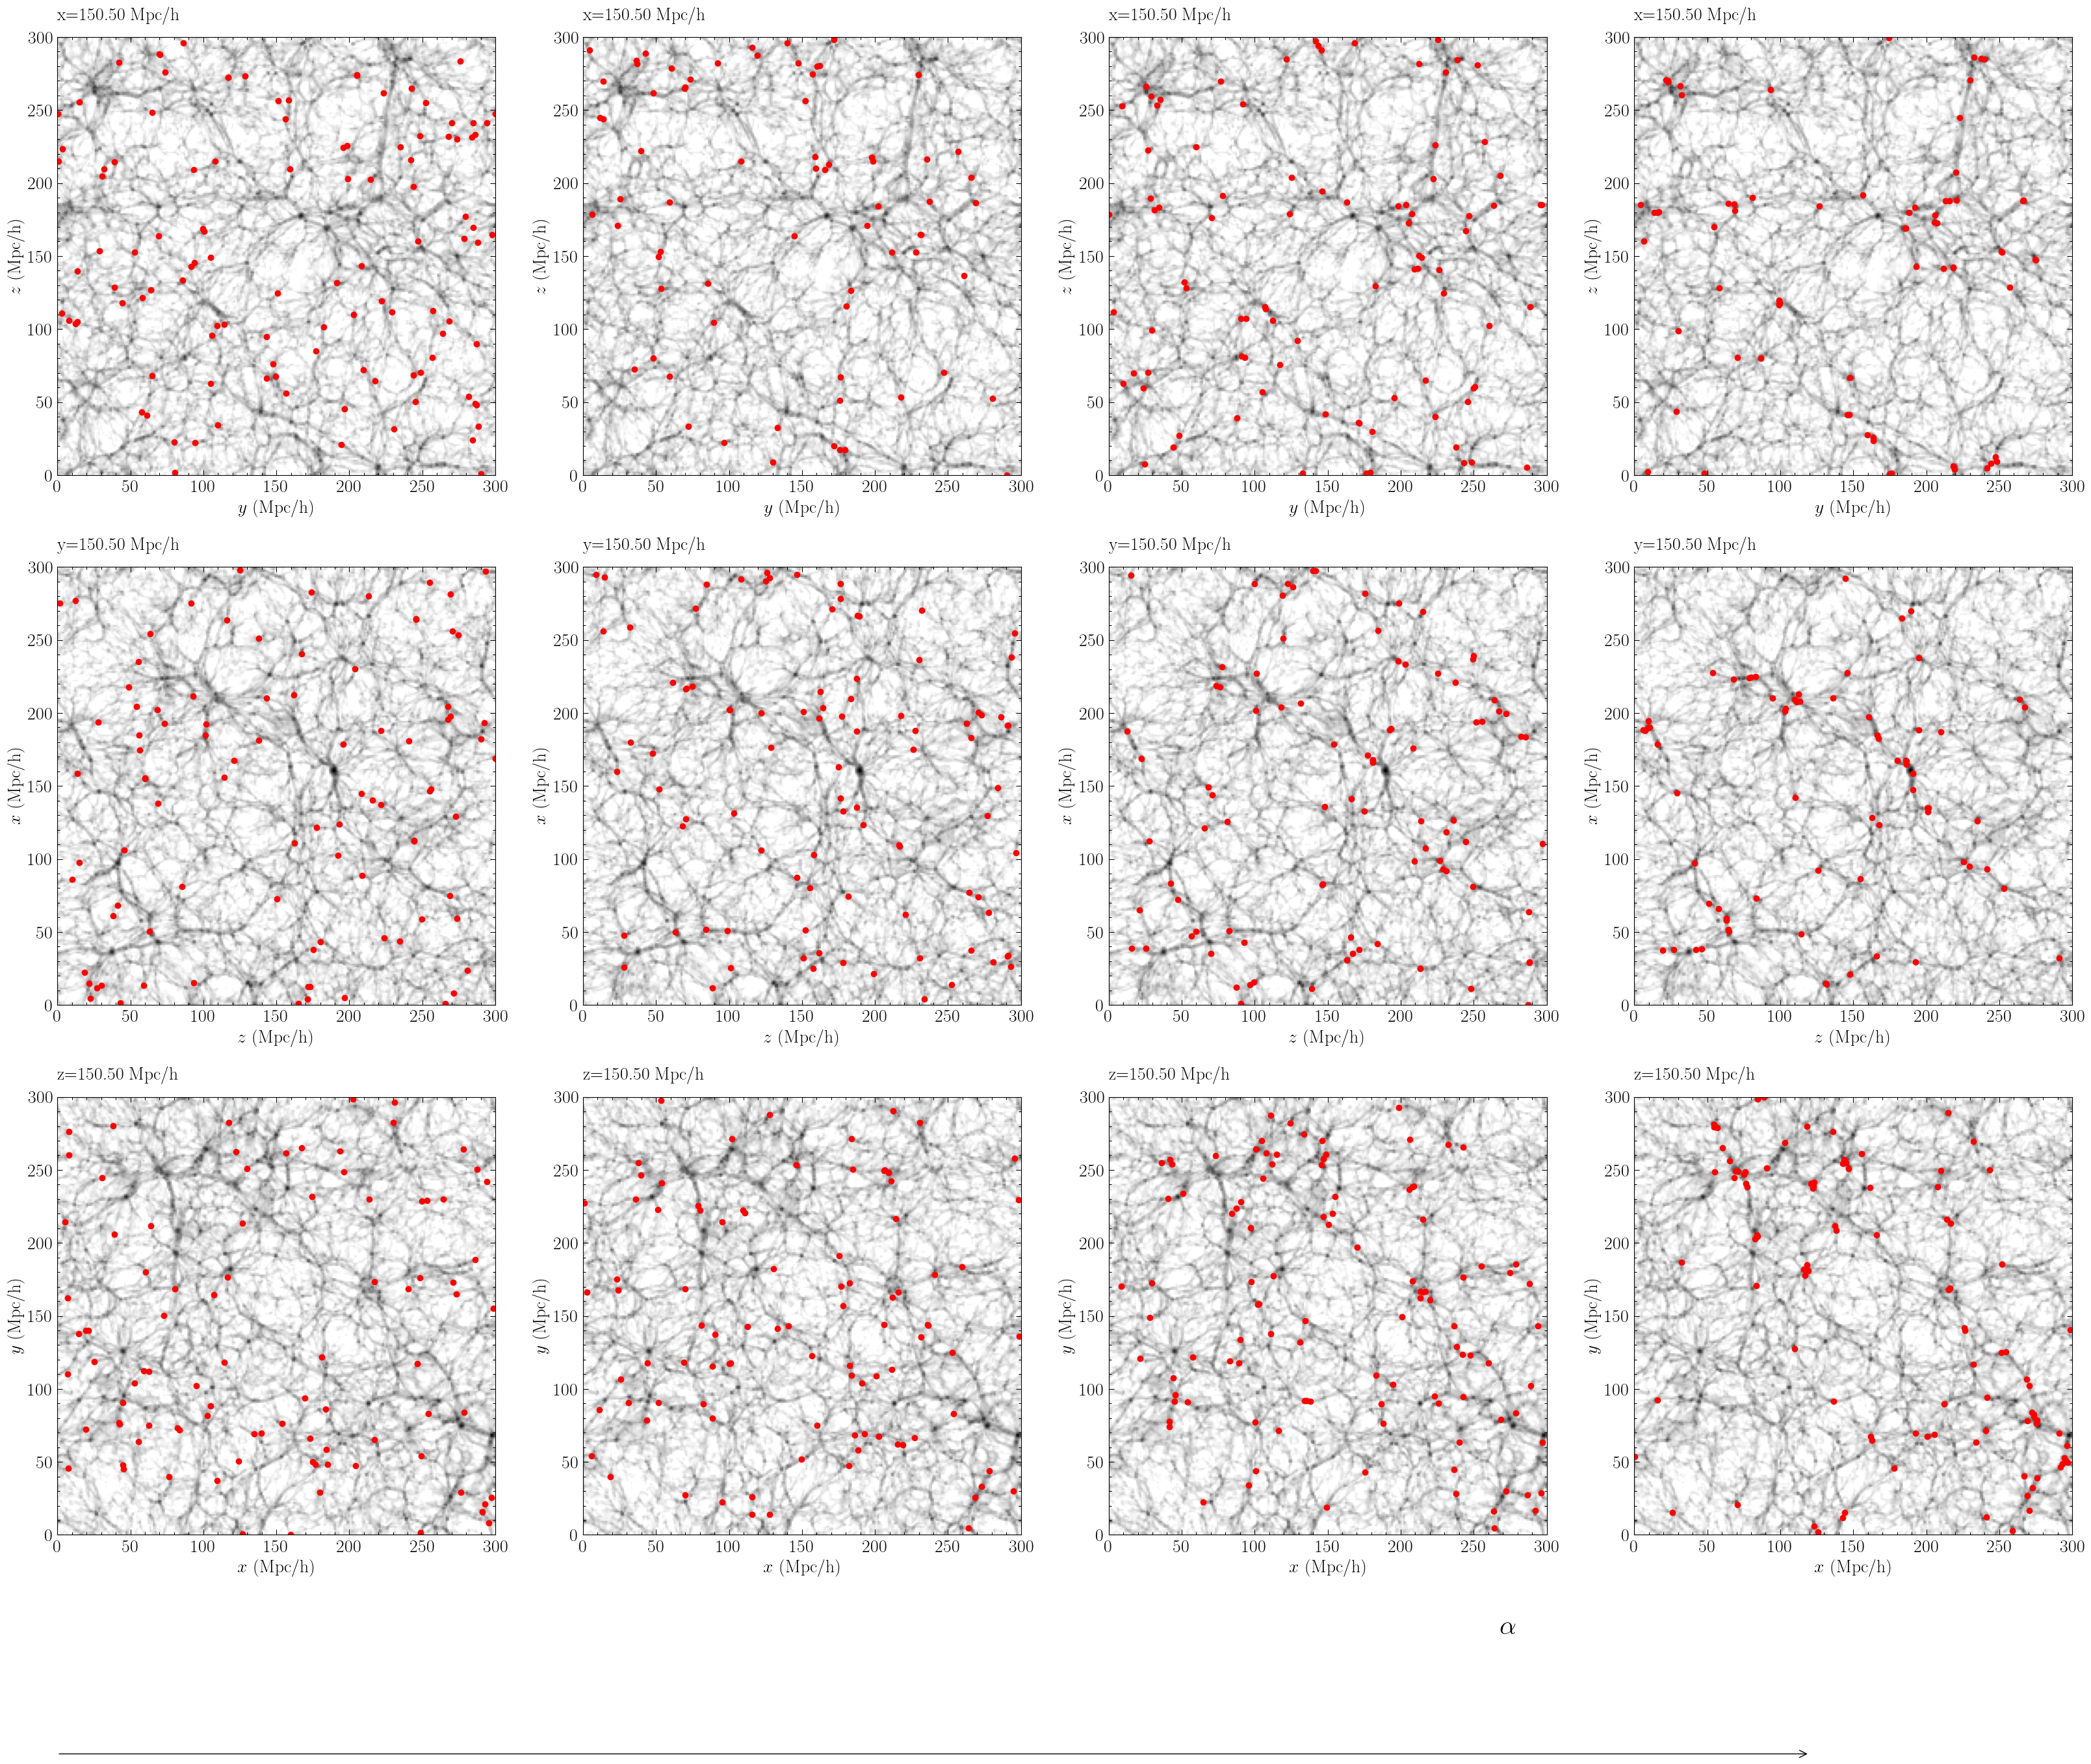

In [10]:
r0=150.5
L=300
pix=256
l_pix=L/pix
x_pix=int(r0/l_pix)
print((x_pix)*l_pix-l_pix/2, (x_pix)*l_pix+l_pix/2)
fig, axes_m=plt.subplots(3,4, figsize=(40,30))

for j in range(3):
    for i in range(4):
        ax,imp=plot_slice(data_cic, axis=j,L=300, r0=r0, ax=axes_m[j][i])
        Pos1=Pos_al[i]
        cond=(Pos1[j]>(x_pix)*l_pix-l_pix/2)&(Pos1[j]<(x_pix)*l_pix+l_pix/2)
        
        if (j==0):
            ax.plot(Pos1[1,cond], Pos1[2, cond], "ro")
        elif (j==1):
            ax.plot(Pos1[2,cond], Pos1[0, cond], "ro")
        elif (j==2):
            ax.plot(Pos1[0,cond], Pos1[1, cond], "ro")
            
axes_m[-1][0].annotate('', xy=(0, -0.5), xycoords='axes fraction', xytext=(4, -0.5),
arrowprops=dict(arrowstyle="<-", color='k'))
fig.text(0.68, 0.06, r"$\alpha$", fontsize=30)
            
plt.savefig("slice12_alpha.pdf")

In [11]:
hi=Pos_al[0]
hi[0]

array([ 10.29331,  15.80872,  13.31899, ..., 297.63812, 283.01361,
       296.83936])

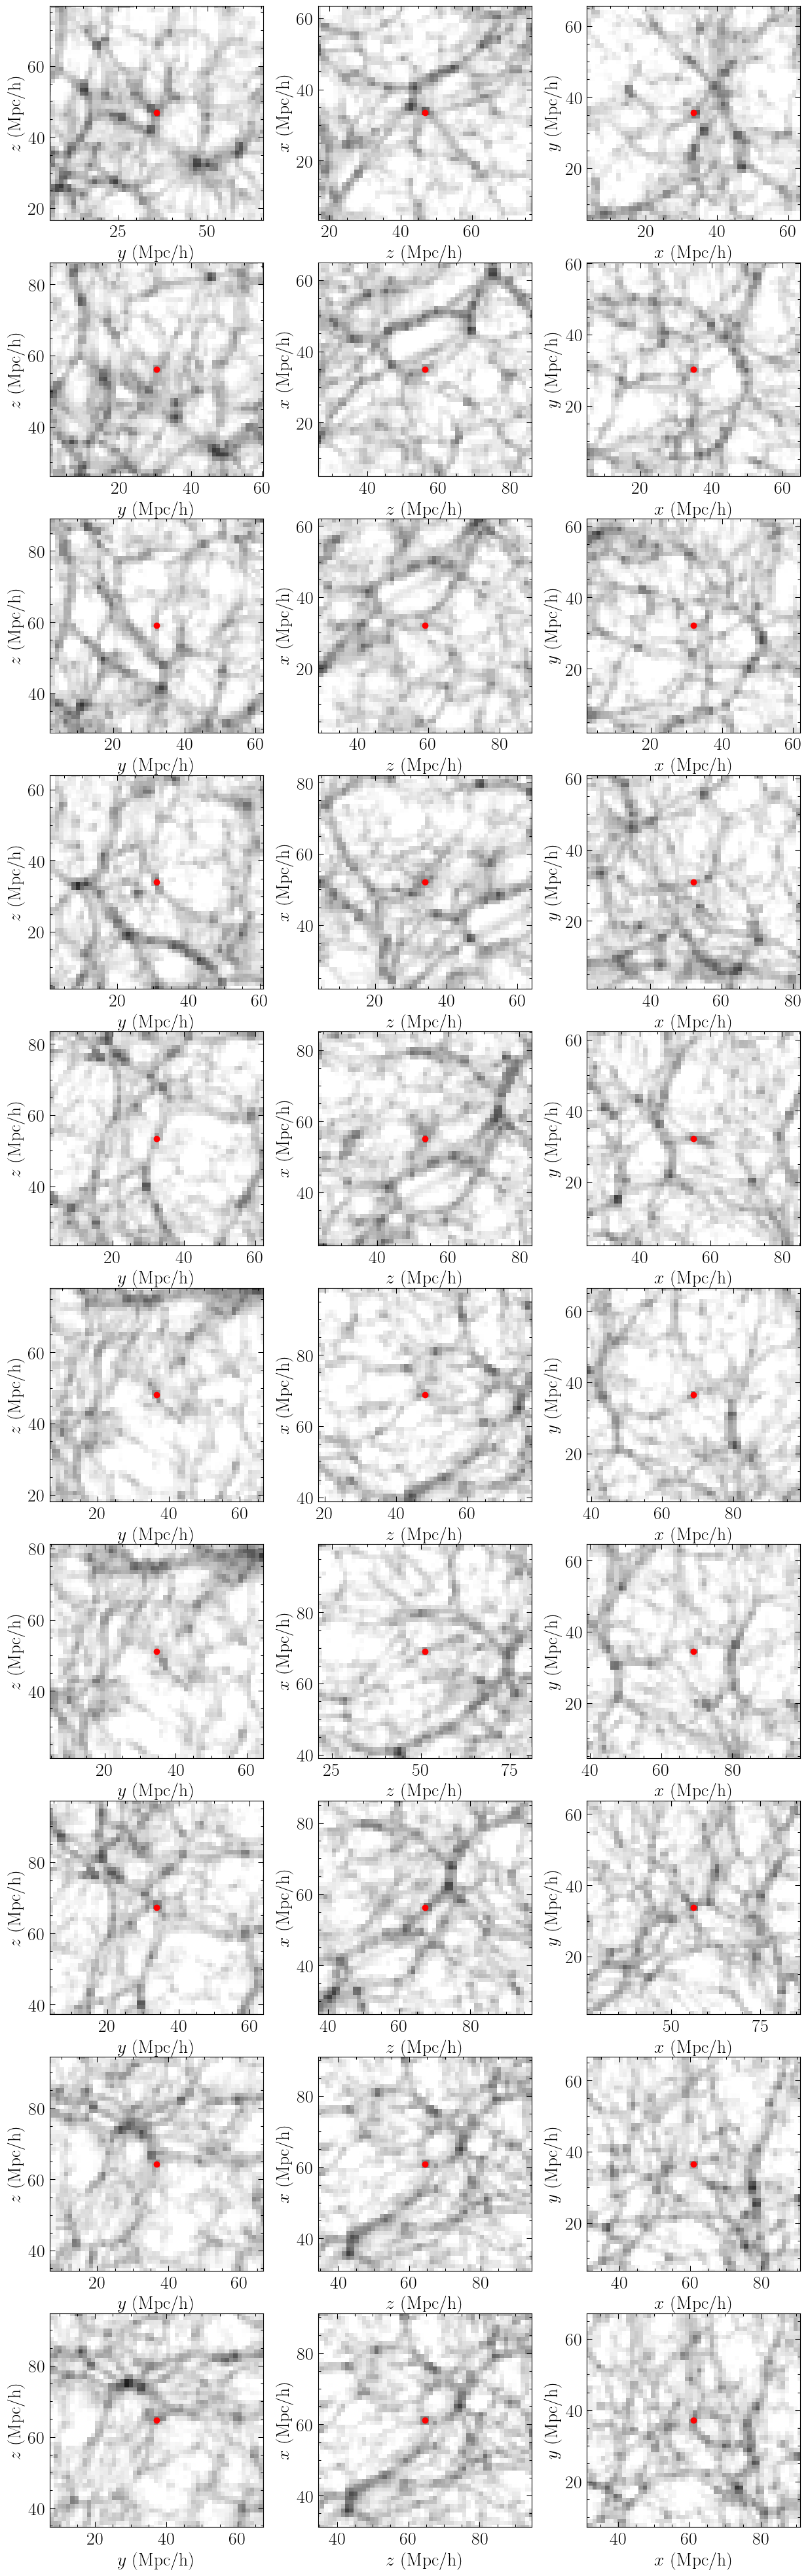

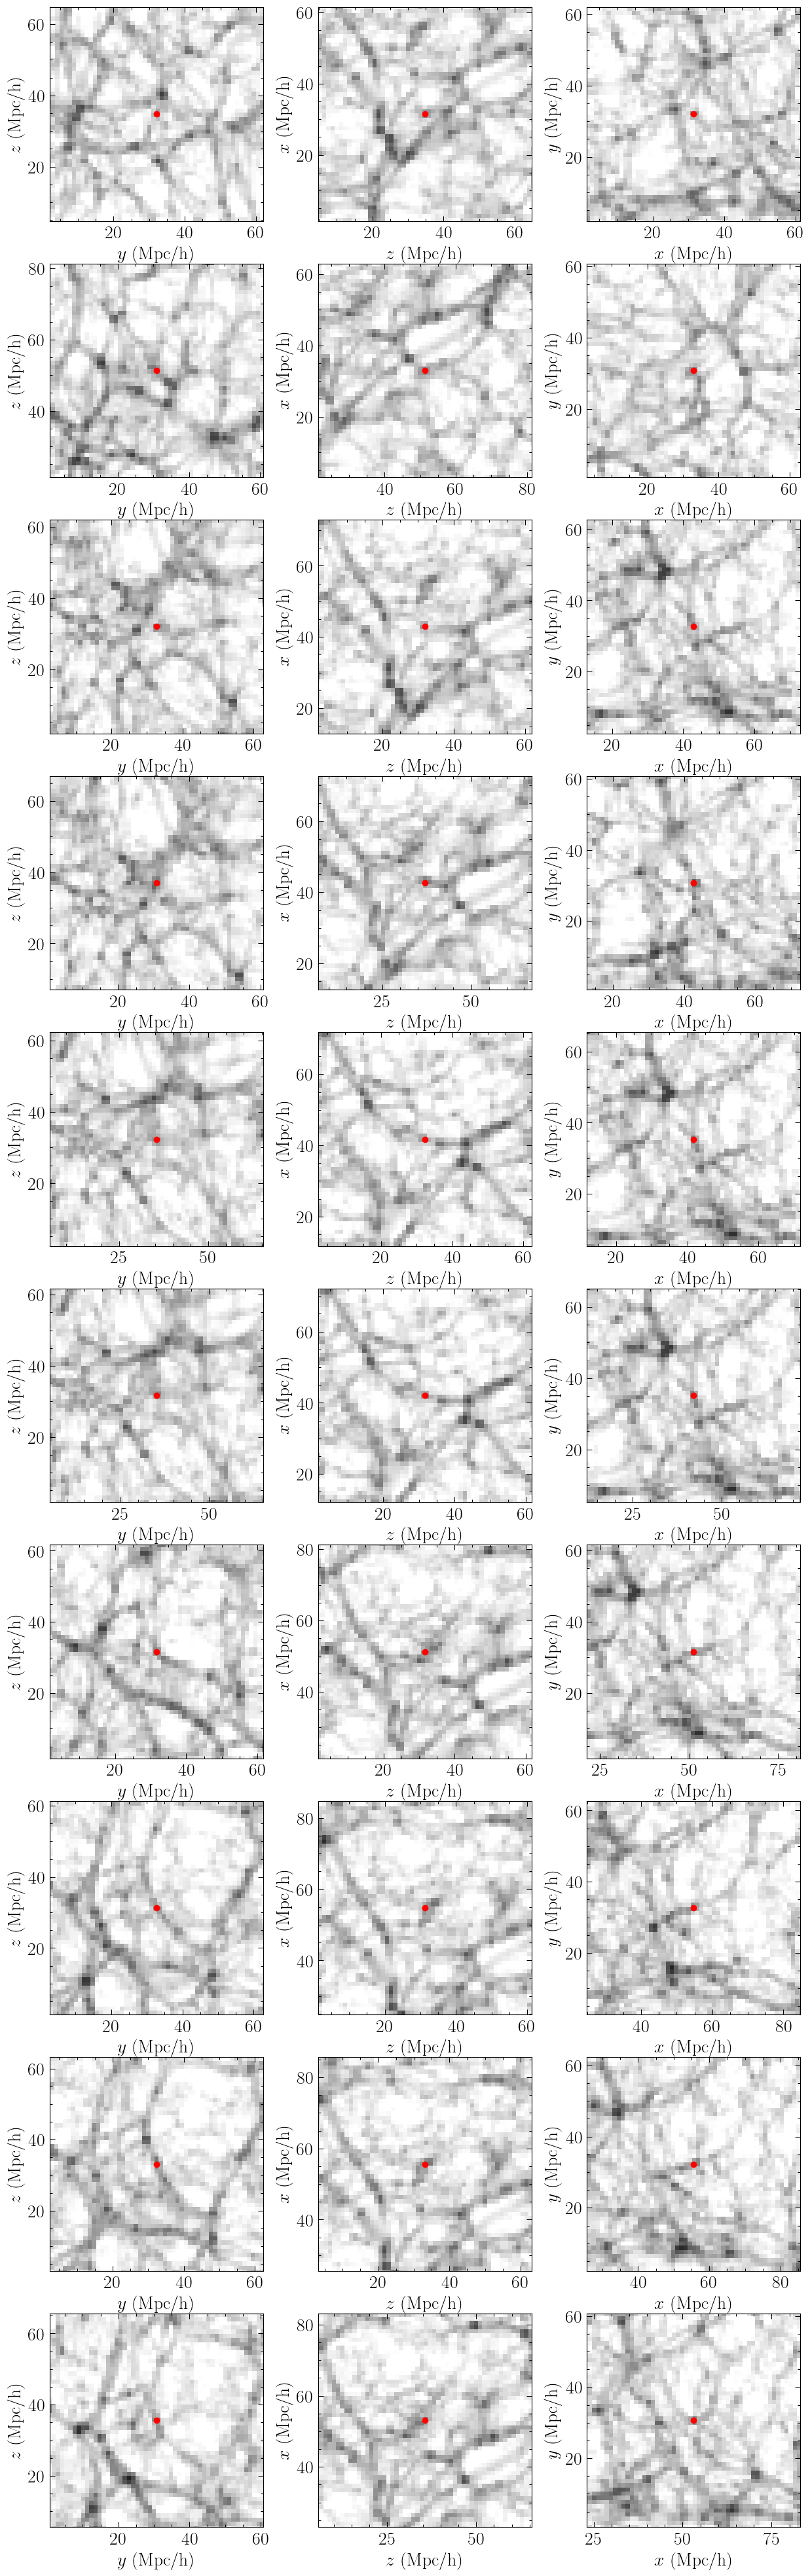

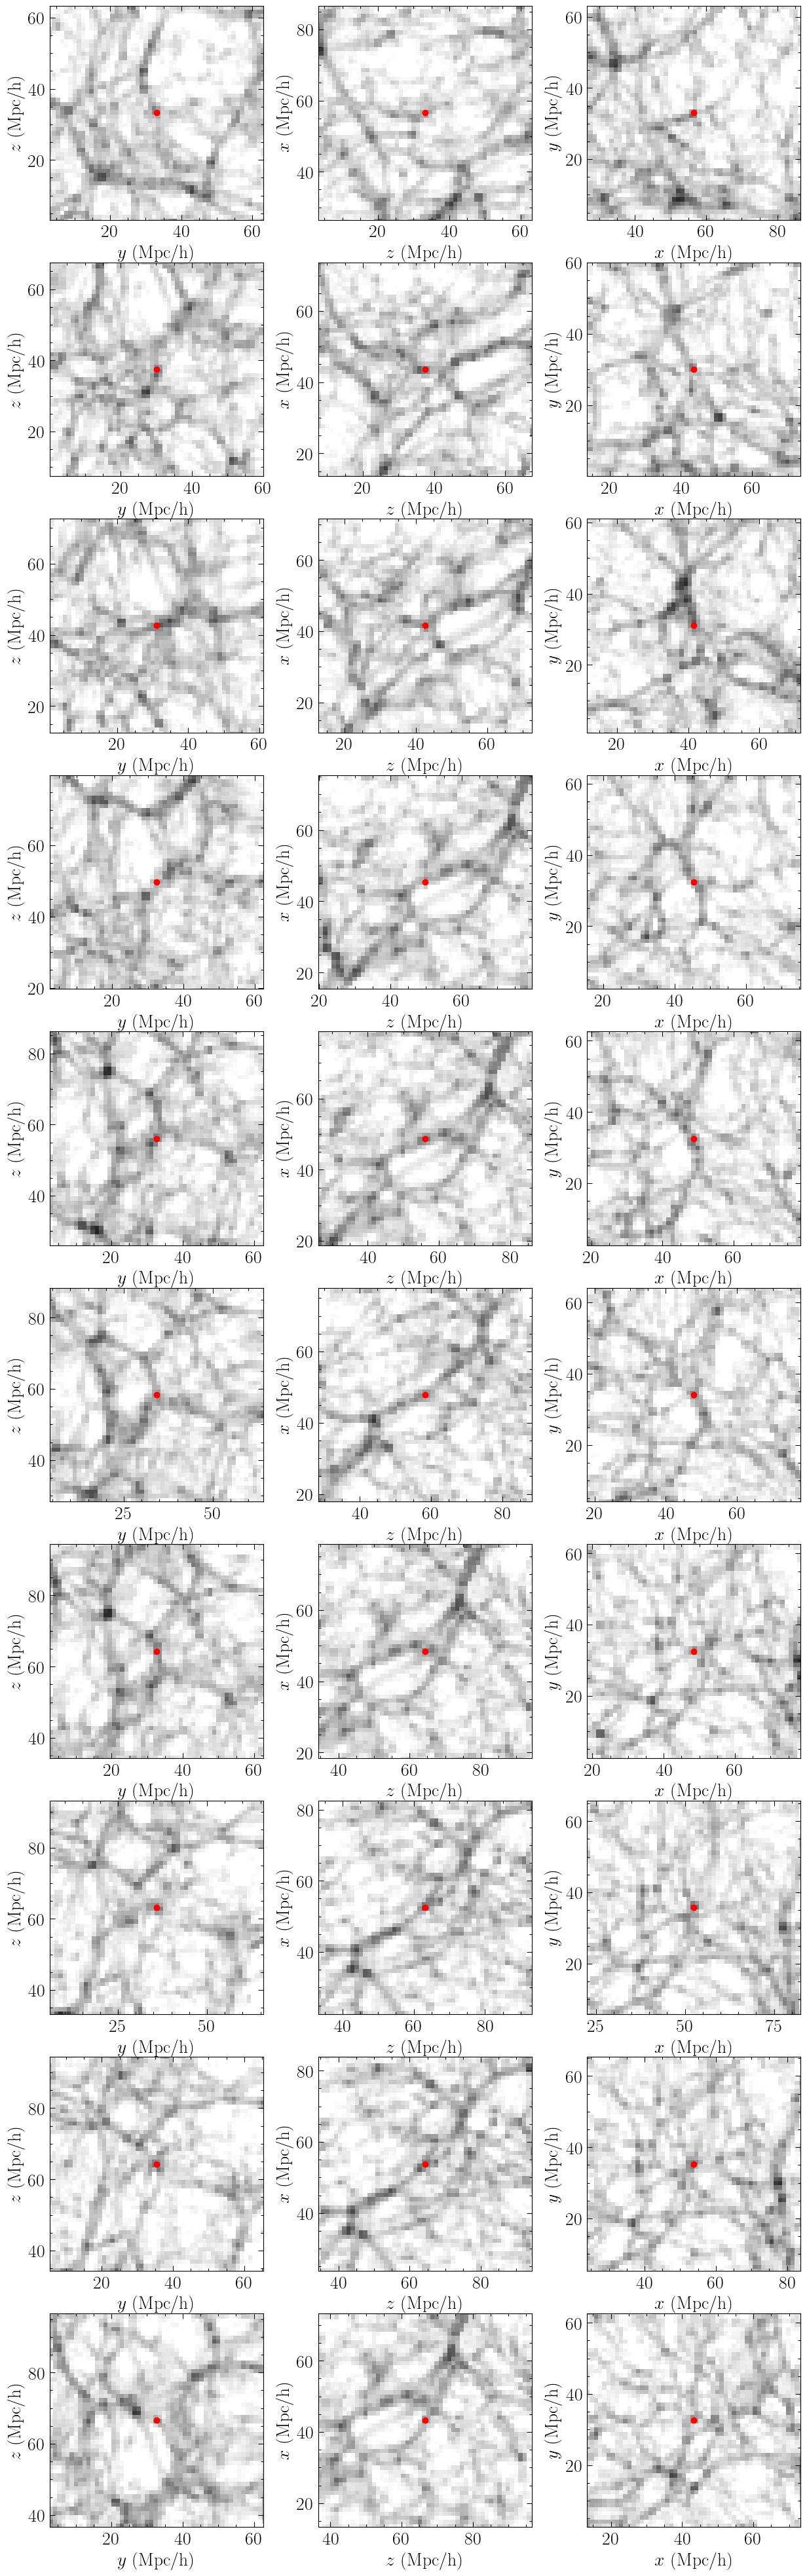

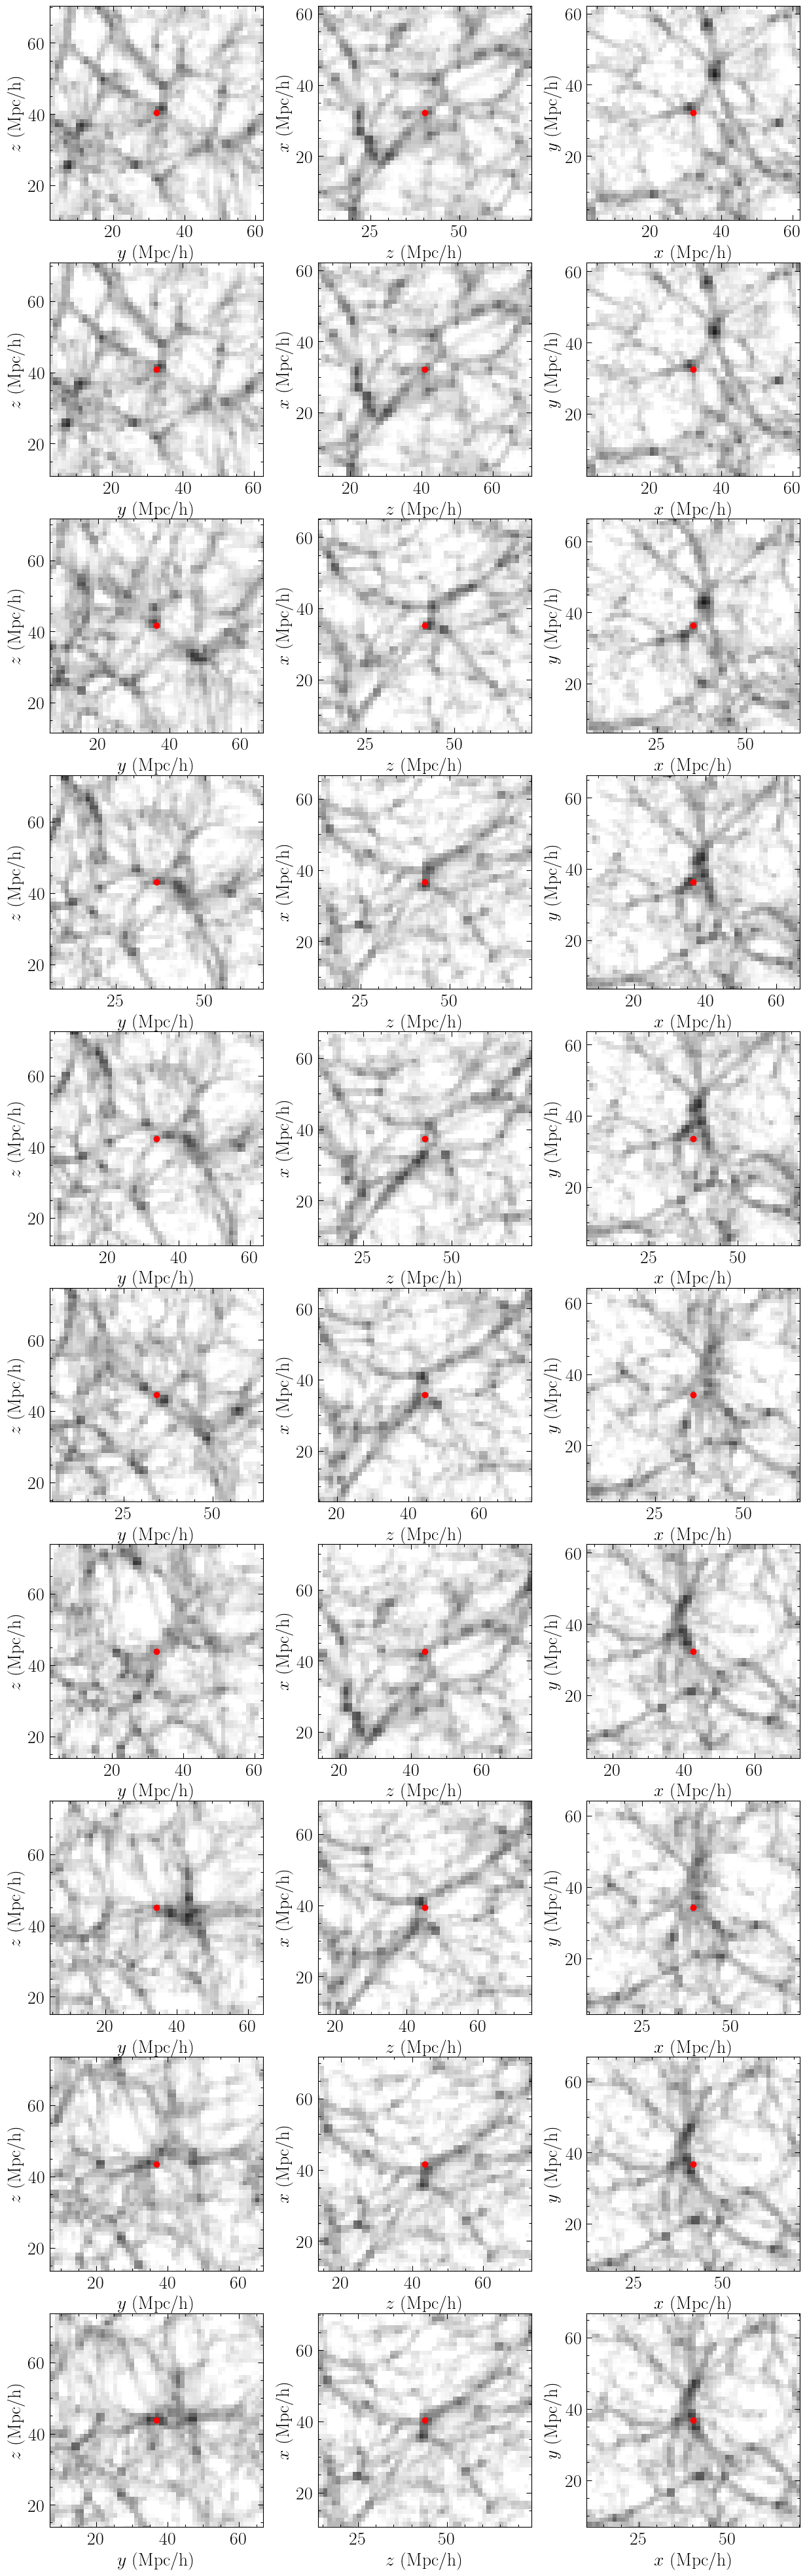

In [12]:
r0=150.5
L=300
pix=256
l_pix=L/pix

# print((x_pix)*l_pix-l_pix/2, (x_pix)*l_pix+l_pix/2)

N=10
dl=30
#for smallest alpha
for k in range(4):
    Pos_new=Pos_al[k]
    cuts=np.where((Pos_new[0]>dl)&(Pos_new[0]<L-dl)&(Pos_new[1]>dl)&(Pos_new[1]<L-dl)
                   &(Pos_new[2]>dl)&(Pos_new[2]<L-dl))[0]
    Pos_new=Pos_new[:, cuts]
    ind=np.random.randint(len(Pos_new[0]), size=N) #randomly chosen halos
    fig, axes_m=plt.subplots(N,3, figsize=(15,5*N))

    for i in range(len(ind)):
        for j in range(3):
            ax,imp=plot_slice(data_cic, axis=j,L=300, r0=Pos_new[j,i], ax=axes_m[i][j], label=False)
            x_pix=int(Pos_new[j,i]/l_pix)
            if (j==0):
                ax.plot(Pos_new[1,i], Pos_new[2, i], "ro")
                ax.set_xlim(Pos_new[1,i]-dl, Pos_new[1,i]+dl)
                ax.set_ylim(Pos_new[2,i]-dl, Pos_new[2,i]+dl)
            elif (j==1):
                ax.plot(Pos_new[2,i], Pos_new[0, i], "ro")
                ax.set_xlim(Pos_new[2,i]-dl, Pos_new[2,i]+dl)
                ax.set_ylim(Pos_new[0,i]-dl, Pos_new[0,i]+dl)
            elif (j==2):
                ax.plot(Pos_new[0,i], Pos_new[1, i], "ro")
                ax.set_xlim(Pos_new[0,i]-dl, Pos_new[0,i]+dl)
                ax.set_ylim(Pos_new[1,i]-dl, Pos_new[1,i]+dl)

    plt.savefig("slice_alpha%d.pdf"%k)

In [49]:
(150-200)%150

100